In [2]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr
matplotlib.rcParams['figure.figsize']=(5,5)

Documentation

1. finding missing values in the dataset

2. some values of diameter was missing.so removed those rows from dataset

3. Some of the parameters were missing most of the values(more than 90%) so removing those parameters as they will not be providing sufficient information about the diameter.

4. Changing the datatype of diameter from Object to Float.

5. Plotting graphs to understant the distribution of data points.

In [3]:
asteroid=pd.read_csv("/content/drive/MyDrive/Asteroid_Updated.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
asteroid.shape

(839714, 31)

In [5]:
asteroid.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [6]:
asteroid['class'].value_counts()

MBA    747420
OMB     24715
IMB     17552
MCA     17354
APO     11759
AMO      8020
TJN      7385
TNO      3310
ATE      1601
CEN       488
AST        84
IEO        20
HYA         4
PAA         2
Name: class, dtype: int64

In [7]:
print("columns in asteroid",list(asteroid.columns))

columns in asteroid ['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G', 'moid', 'class', 'n', 'per', 'ma']


info regarding columns


*   name=Name of asteroid
*   a= semi major axis
*   e-eccentricity
*   i- inclination with respect to x-y elliptical plane
*   om - longitude of the ascending node
*   w- argument of perihelion
*   q - perihelion distance
*   ad - aphelion distance
*   per_y - orbital period
*   data_Arc - data arc span(d)
*   condition_Code = orbit condition code
*   n_obs_used - number of observation used
*   H - absolute magnitude parameter
*   neo-Near earth object
*   pha - Physically hazardous object
*   diameter - diameter of asteroids
*   extent - Object bi/tri axial ellipsoid dimensions(Km)
*   albedo - geometric albedo
*   rot_per - rotation period



In [8]:
#finding missing values in dataset
asteroid.isnull().sum()

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

In [9]:
#looking at missing values of diameter
asteroid[asteroid['diameter'].isnull()].head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
681,Hagar,2.654040,0.171983,11.505647,190.799959,104.993824,2.197591,3.110489,4.323837,40313.0,...,NaN,NaN,NaN,NaN,NaN,1.215450,MBA,0.227952,1579.281370,134.457728
698,Hela,2.610998,0.410284,15.299180,242.551766,91.399514,1.539746,3.682249,4.219081,42540.0,...,0.386,NaN,Sq,S,NaN,0.624487,MCA,0.233612,1541.019467,237.586385
718,Albert,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.080348,4.286601,39478.0,...,NaN,NaN,S,NaN,NaN,0.203359,AMO,0.229932,1565.680891,48.317252
729,Athanasia,2.243362,0.177505,4.234895,95.073806,123.549777,1.845154,2.641570,3.360139,39112.0,...,NaN,NaN,NaN,NaN,NaN,0.841461,MBA,0.293329,1227.290668,295.120065
842,Nicolaia,2.279598,0.209766,7.997715,4.071354,316.957209,1.801415,2.757780,3.441878,37651.0,...,NaN,NaN,NaN,NaN,NaN,0.798230,MBA,0.286363,1257.146084,317.982712


In [10]:
#removing those columns which have missing values of diameter
asteroid=asteroid.dropna(subset=['diameter'])

In [11]:
asteroid.shape

(137636, 31)

In [12]:
asteroid.isnull().sum()

name              122512
a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             138
condition_code         0
n_obs_used             0
H                    747
neo                    0
pha                    0
diameter               0
extent            137620
albedo              1230
rot_per           126448
GM                137622
BV                136631
UB                136671
IR                137635
spec_B            136266
spec_T            136671
G                 137517
moid                   0
class                  0
n                      0
per                    0
ma                     0
dtype: int64

In [13]:
#removing those variable which have a lot of missing values
asteroid=asteroid.drop('name',axis=1)
asteroid=asteroid.drop('extent',axis=1)
asteroid=asteroid.drop('GM',axis=1)
asteroid=asteroid.drop('BV',axis=1)
asteroid=asteroid.drop('UB',axis=1)
asteroid=asteroid.drop('IR',axis=1)
asteroid=asteroid.drop('spec_B',axis=1)
asteroid=asteroid.drop('spec_T',axis=1)
asteroid=asteroid.drop('G',axis=1)
asteroid=asteroid.drop('rot_per',axis=1)

In [14]:
asteroid.isnull().sum()

a                    0
e                    0
i                    0
om                   0
w                    0
q                    0
ad                   0
per_y                0
data_arc           138
condition_code       0
n_obs_used           0
H                  747
neo                  0
pha                  0
diameter             0
albedo            1230
moid                 0
class                0
n                    0
per                  0
ma                   0
dtype: int64

In [15]:
asteroid.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                object
pha                object
diameter           object
albedo            float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

In [16]:
asteroid['diameter']=asteroid['diameter'].astype(float)
asteroid['a']=asteroid['a'].astype(float)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd902364550>,
      dtype=object)

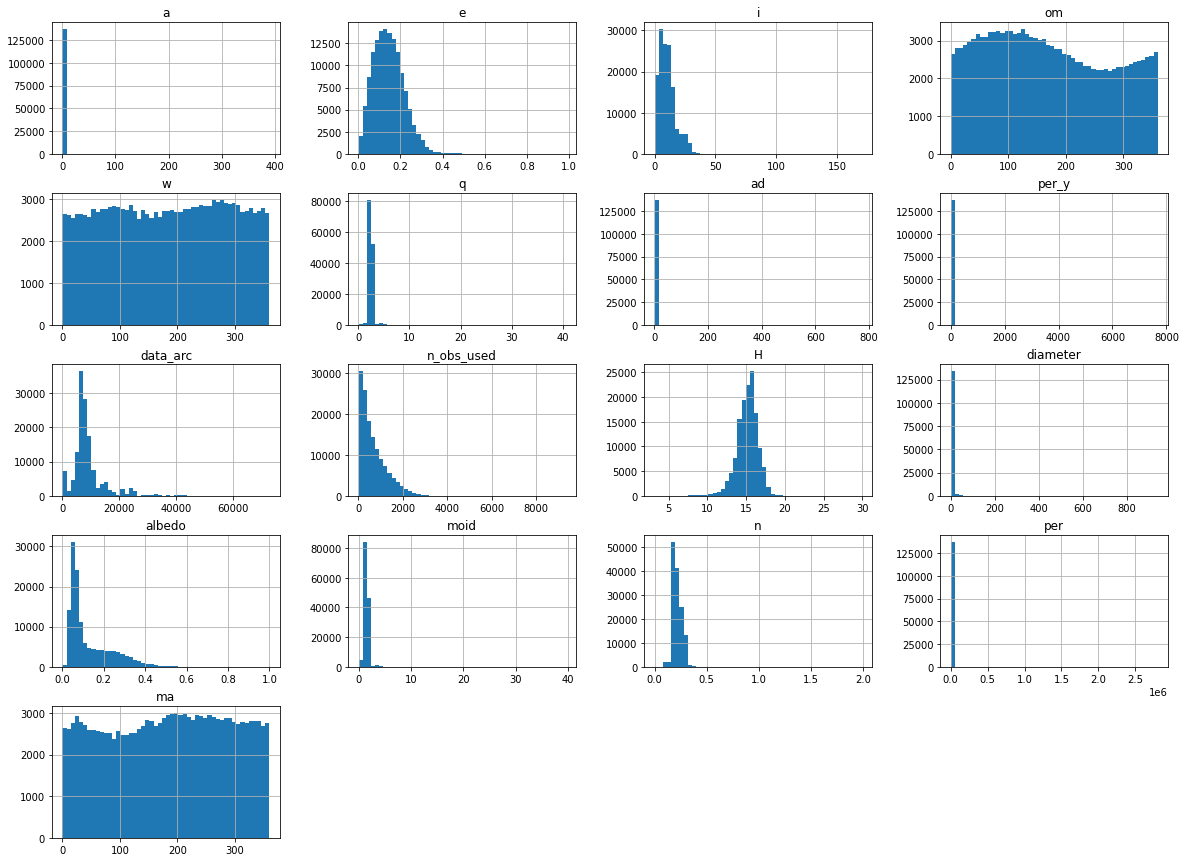

In [17]:
asteroid.hist(bins=50, figsize=(20 ,15))

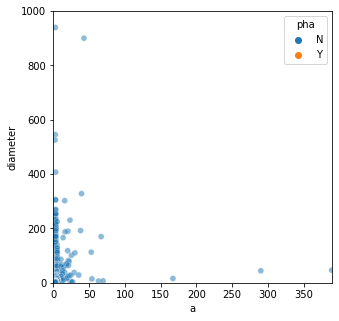

In [18]:
sns.scatterplot(data=asteroid,x='a',y='diameter',hue='pha',alpha=0.5)
plt.xlim([0,390])
plt.ylim([0,1000])
plt.show();

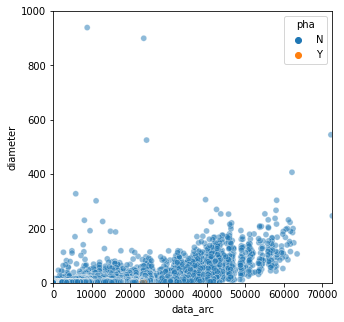

In [19]:
sns.scatterplot(data=asteroid,x='data_arc',y='diameter',hue='pha',alpha=0.5)
plt.xlim([0,72684])
plt.ylim([0,1000])
plt.show();

In [20]:
max(asteroid['albedo'])

1.0

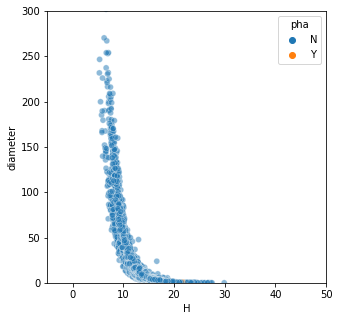

In [21]:
sns.scatterplot(data=asteroid,x='H',y='diameter',hue='pha',alpha=0.5)
plt.xlim([-5,50])
plt.ylim([0,300])
plt.show();

In [22]:
asteroid['H'] = -1*np.log(asteroid['H'])
asteroid['H'].max()

-1.1631508098056809

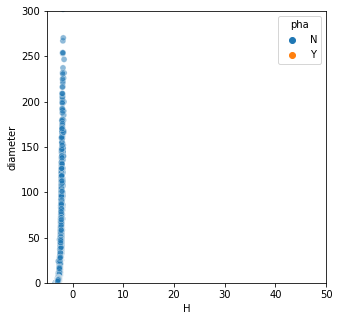

In [23]:
sns.scatterplot(data=asteroid,x='H',y='diameter',hue='pha',alpha=0.5)
plt.xlim([-5,50])
plt.ylim([0,300])
plt.show();

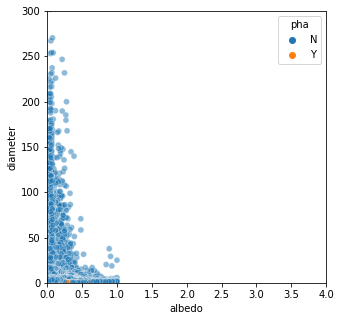

In [24]:
sns.scatterplot(data=asteroid,x='albedo',y='diameter',hue='pha',alpha=0.5)
plt.xlim([0,4])
plt.ylim([0,300])
plt.show();

In [25]:
asteroid['albedo'] = -1*np.log(asteroid['albedo'])
asteroid['albedo'].max()

6.907755278982137

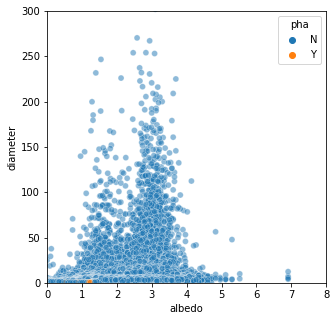

In [26]:
sns.scatterplot(data=asteroid,x='albedo',y='diameter',hue='pha',alpha=0.5)
plt.xlim([0,8])
plt.ylim([0,300])
plt.show();

In [27]:
asteroid['class'].value_counts()

MBA    126390
OMB      7510
TJN      1874
IMB       588
APO       486
MCA       355
AMO       269
ATE        95
CEN        49
TNO        13
AST         7
Name: class, dtype: int64

In [28]:
asteroid.isnull().sum()

a                    0
e                    0
i                    0
om                   0
w                    0
q                    0
ad                   0
per_y                0
data_arc           138
condition_code       0
n_obs_used           0
H                  747
neo                  0
pha                  0
diameter             0
albedo            1230
moid                 0
class                0
n                    0
per                  0
ma                   0
dtype: int64

In [29]:
asteroid.shape

(137636, 21)

data_arc=i,n_obs_used,H,diameter,albedo,data_arc (6)

H=e,q,data_arc,n_obs_used,diameter,albedo,moid,n  (8)

albedo=a,q,data_arc,n_obs_used,H,diameter,moid,n  (8)

## **EDA**

In [30]:
cols=['data_arc','H','albedo']

In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2)
asteroid[cols] = impute_knn.fit_transform(asteroid[cols])

In [32]:
asteroid.isna().sum()

a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
neo               0
pha               0
diameter          0
albedo            0
moid              0
class             0
n                 0
per               0
ma                0
dtype: int64

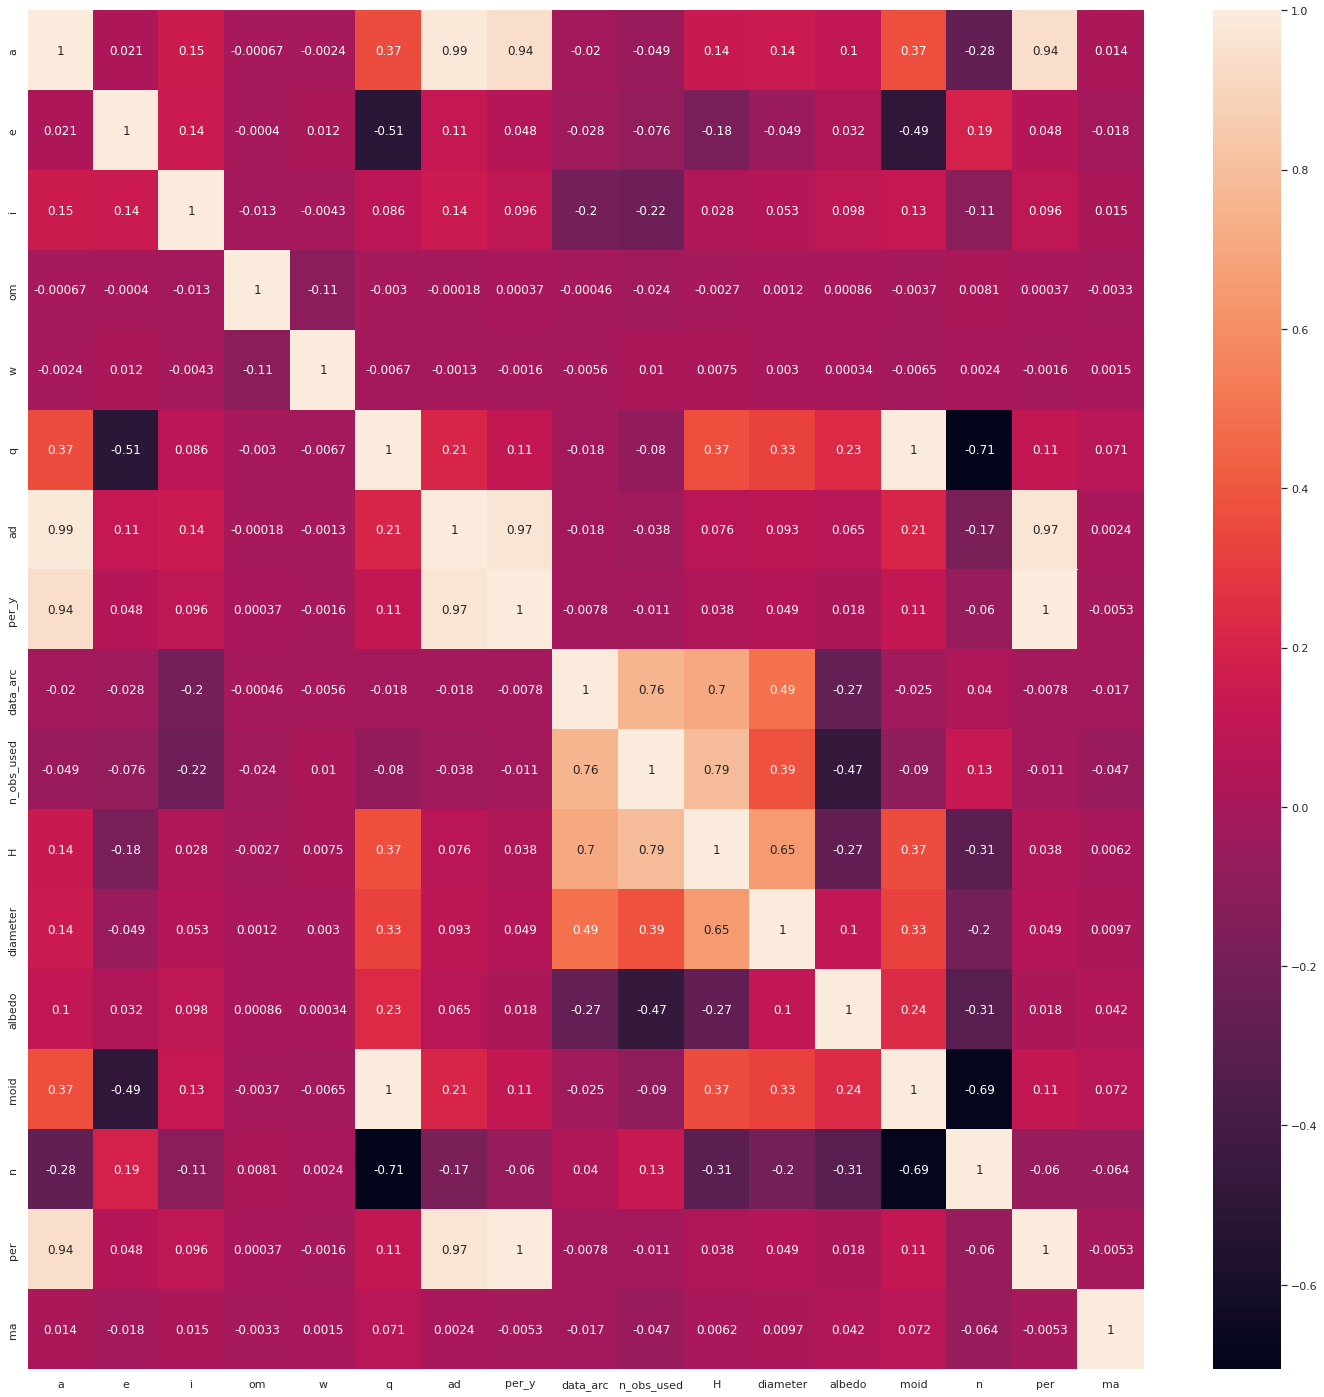

In [33]:
sns.set(rc = {'figure.figsize':(25,25)})
sns.heatmap(asteroid.select_dtypes(['float64' , 'int64']).corr(),annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


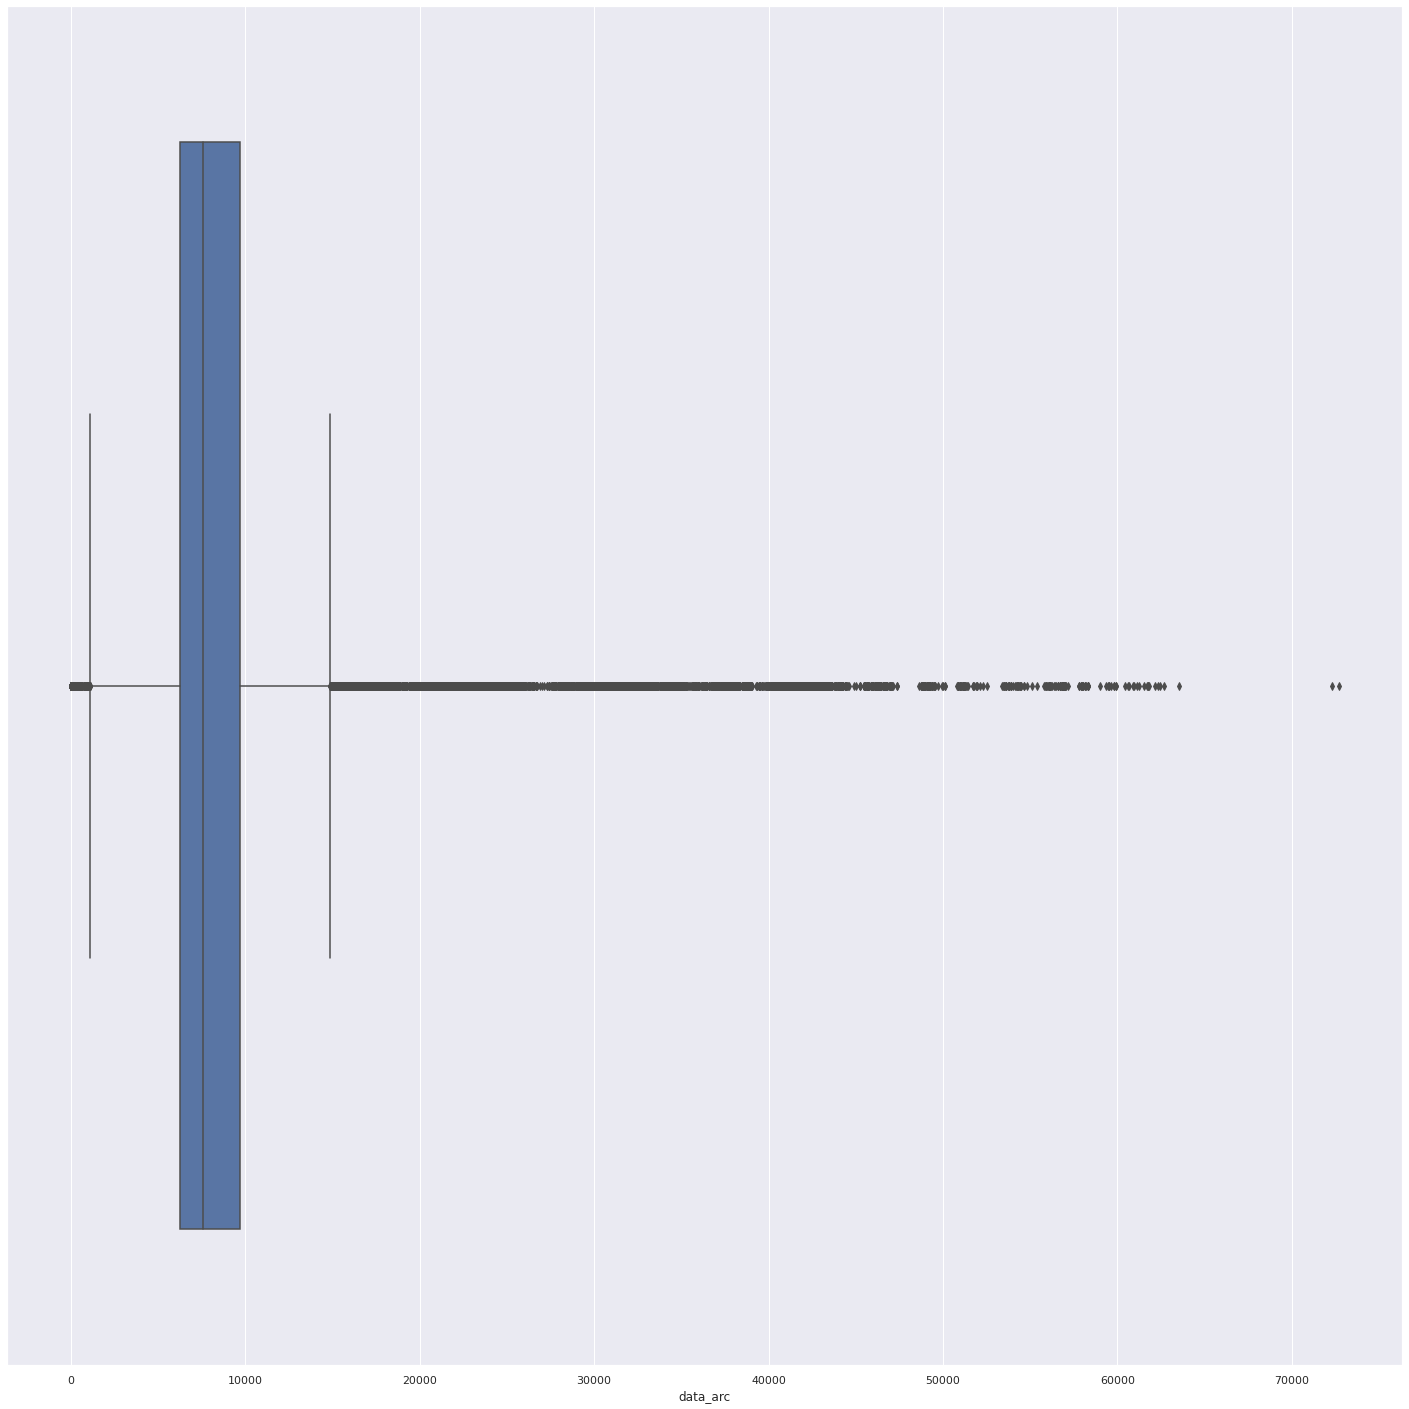

In [34]:
sns.boxplot(asteroid['data_arc'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


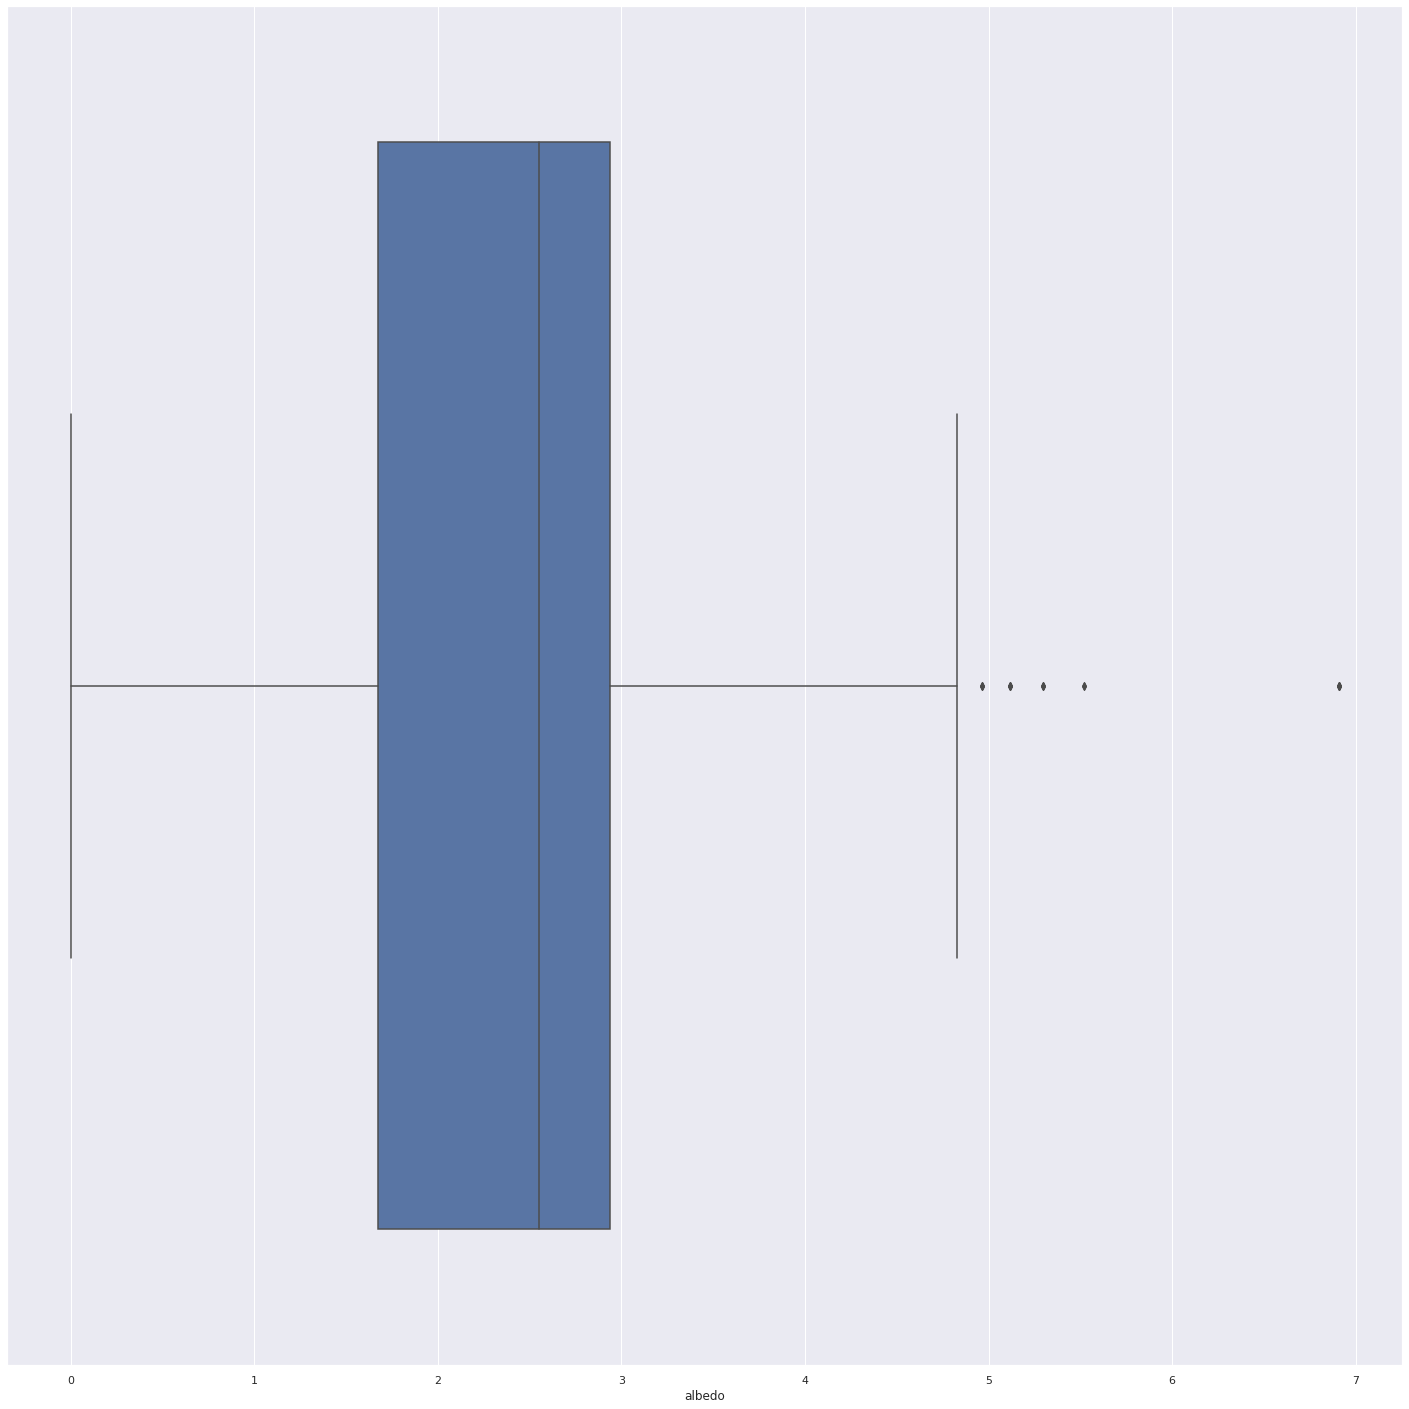

In [35]:
sns.boxplot(asteroid['albedo'])

In [36]:
#finding corelation of different variables with Diameter 
for i in asteroid.select_dtypes(['float64' , 'int64']):
   coef, p = spearmanr(asteroid[i], asteroid['diameter'])
   print("corelation of ",i,'=',coef)

corelation of  a = 0.5701489865858509
corelation of  e = -0.14813765496168466
corelation of  i = 0.132370681553146
corelation of  om = 0.0014940115733321705
corelation of  w = 0.005160507891247732
corelation of  q = 0.5246860997056233
corelation of  ad = 0.48296879972181944
corelation of  per_y = 0.5701489865858509
corelation of  data_arc = 0.3738177316963192
corelation of  n_obs_used = 0.42924001030778874
corelation of  H = 0.7453447486469593
corelation of  diameter = 0.9999999999999998
corelation of  albedo = 0.26240106500278454
corelation of  moid = 0.5292709954026358
corelation of  n = -0.5701489865858509
corelation of  per = 0.5701489865858509
corelation of  ma = 0.03229989195106305


In [37]:
#combining low corelation features together in ration of their corelation so on reducing dimension all info from those is not lost
asteroid['neg']=-0.14*asteroid['e']+0.26*asteroid['albedo']
asteroid['pos']=0.13*asteroid['i']+0.0014*asteroid['om']+0.005*asteroid['w']+0.032*asteroid['ma']+0.37*asteroid['data_arc']
asteroid.drop(['e','albedo'],axis=1,inplace=True)
asteroid.drop(['i','om','w','ma','data_arc'],axis=1,inplace=True)

In [38]:
#finding corelation of different variables with Diameter 
for i in asteroid.select_dtypes(['float64' , 'int64']):
   coef, p = spearmanr(asteroid[i], asteroid['diameter'])
   print("corelation of ",i,'=',coef)

corelation of  a = 0.5701489865858509
corelation of  q = 0.5246860997056233
corelation of  ad = 0.48296879972181944
corelation of  per_y = 0.5701489865858509
corelation of  n_obs_used = 0.42924001030778874
corelation of  H = 0.7453447486469593
corelation of  diameter = 0.9999999999999998
corelation of  moid = 0.5292709954026358
corelation of  n = -0.5701489865858509
corelation of  per = 0.5701489865858509
corelation of  neg = 0.2711543239710166
corelation of  pos = 0.37441909407041135


In [39]:
asteroid["neo"]=asteroid["neo"].replace({'Y':1,'N':0})
asteroid["pha"]=asteroid["pha"].replace({'Y':1,'N':0})
df=['n']
asteroid[df]=-1*asteroid[df]

In [40]:
asteroid=asteroid.drop(['class'],axis=1)

In [41]:
from sklearn.model_selection import train_test_split
predictors = asteroid.drop('diameter',axis=1) 
target = asteroid['diameter']
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

# **Predicting values**

# **PREDICTING VALUES USING DL**

In [43]:
from keras.models import Sequential
from keras.layers import Dense

In [44]:
asteroid.shape

(137636, 15)

Define network for prediction

In [45]:
 model = Sequential([
	Dense(14, input_shape=(14,), kernel_initializer='normal', activation='relu'),
	Dense(28, kernel_initializer='normal', activation='relu'),
	Dense(1, kernel_initializer='normal')
   ])

In [46]:
 model.compile(loss='mean_squared_error', optimizer='adam')


In [47]:
x =asteroid.drop(['diameter'],axis=1)

In [48]:
x_y=asteroid['diameter']

In [49]:
x=x.dropna()

In [50]:
x_y=x_y.dropna()

In [51]:
from sklearn import preprocessing

In [52]:
min_max_scaler = preprocessing.MinMaxScaler()
arc_scale = min_max_scaler.fit_transform(x)

In [53]:
x.isna().sum()

a                 0
q                 0
ad                0
per_y             0
condition_code    0
n_obs_used        0
H                 0
neo               0
pha               0
moid              0
n                 0
per               0
neg               0
pos               0
dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
arc_train, arc_val_and_test, arc_y_train, arc_y_val_and_test = train_test_split(arc_scale, x_y, test_size=0.3)

In [56]:
arc_val, arc_test, arc_y_val, arc_y_test = train_test_split(arc_val_and_test, arc_y_val_and_test, test_size=0.5)

In [55]:

hist = model.fit(arc_train, arc_y_train,
          batch_size=100, epochs=20,
          validation_data=(arc_val, arc_y_val))

Epoch 1/20
964/964 [==============================] - 6s 3ms/step - loss: 72.0976 - val_loss: 95.2478
Epoch 2/20
964/964 [==============================] - 3s 3ms/step - loss: 44.3088 - val_loss: 70.5422
Epoch 3/20
964/964 [==============================] - 3s 3ms/step - loss: 33.7988 - val_loss: 54.7747
Epoch 4/20
964/964 [==============================] - 3s 3ms/step - loss: 26.8544 - val_loss: 42.4014
Epoch 5/20
964/964 [==============================] - 3s 3ms/step - loss: 22.5025 - val_loss: 34.2444
Epoch 6/20
964/964 [==============================] - 3s 3ms/step - loss: 19.6417 - val_loss: 29.3768
Epoch 7/20
964/964 [==============================] - 3s 3ms/step - loss: 17.9631 - val_loss: 24.2734
Epoch 8/20
964/964 [==============================] - 4s 4ms/step - loss: 16.4424 - val_loss: 22.7683
Epoch 9/20
964/964 [==============================] - 4s 4ms/step - loss: 15.1895 - val_loss: 18.9766
Epoch 10/20
964/964 [==============================] - 3s 3ms/step - loss: 14.2378

In [56]:
model.evaluate(arc_test, arc_y_test)

646/646 [==============================] - 1s 2ms/step - loss: 7.2274


7.227418422698975

# **Random Forest regressor** 

In [62]:
from sklearn.metrics import r2_score
import seaborn as sns

def plot(prediction):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,7)) 
    sns.distplot(arc_y_test.values,label='test values', ax=ax1)
    sns.distplot(prediction ,label='prediction', ax=ax1)
    ax1.set_xlabel('Distribution plot')
    ax2.scatter(arc_y_test,prediction, c='orange',label='predictions')
    ax2.plot(arc_y_test,arc_y_test,c='blue',label='y=x')
    ax2.set_xlabel('test value')
    ax2.set_ylabel('estimated diameter')
    ax1.legend()
    ax2.legend()
    ax2.axis('scaled') #same x y scale 
def score(prediction):
    score = r2_score(prediction,arc_y_test)
    return score
def announce(score):
    print('The R^2 score achieved using this regression is:', round(score,3))

In [58]:

algorithms = []
scores = []
### Defining the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=22, n_estimators=50)

### Training 
forest.fit(arc_train,np.ravel(arc_y_train))

###Predicting
arc_y_pred_forest = forest.predict(arc_test)

### Scoring
score_forest = score(arc_y_pred_forest)
announce(score_forest)

algorithms.append('RForest')
scores.append(score_forest)

The R^2 score achieved using this regression is: 0.979


In [73]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

# **linear regressor**

In [60]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
#Defining the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

###Training
lr.fit(X_train,Y_train)

###Predicting
Y_pred_lr = lr.predict(X_test)

###Scoring
score_lr = r2_score(Y_pred_lr,Y_test)
print("R^2 value for the regression  :",  round(score_lr,3))
rms = mean_squared_error(Y_test, Y_pred_lr, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : -0.0
rms value for the regression  : 6778893144793.642


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


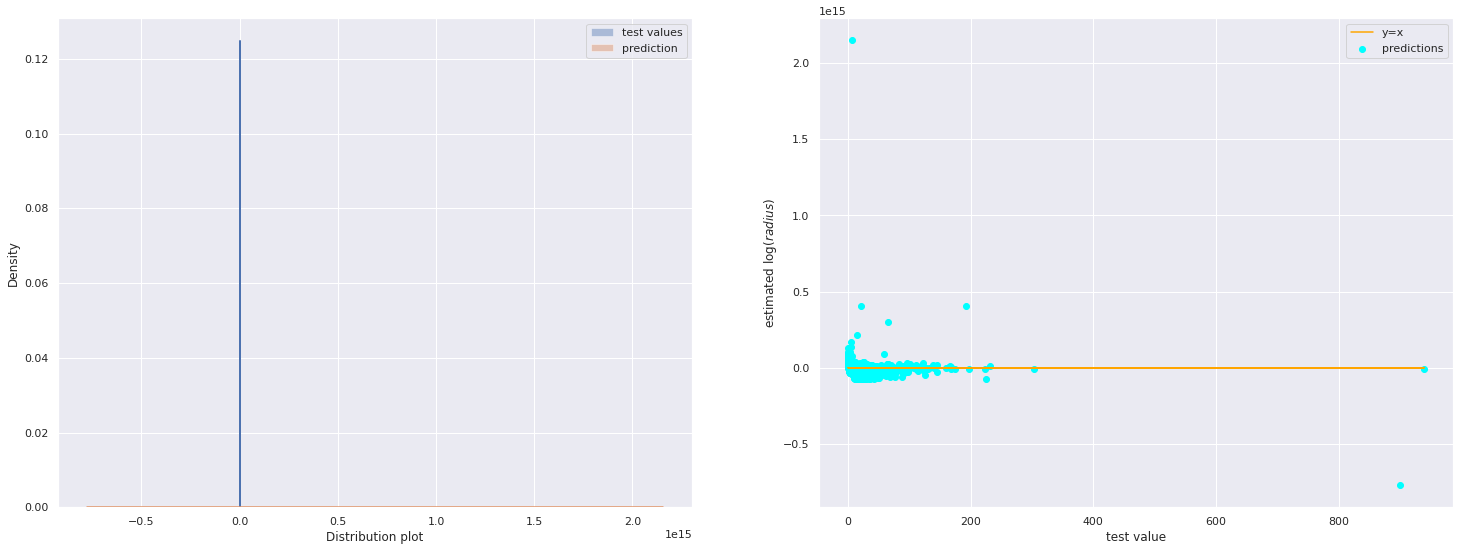

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_lr ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_lr, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()

# **Polynomial regressor**

In [61]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)

pr.fit(X_train,Y_train)
x_poly=pr.fit_transform(X_train)
X_test_poly=pr.fit_transform(X_test)
###Training
lr.fit(x_poly,Y_train)

###Predicting
Y_pred_lr = lr.predict(X_test_poly)

###Scoring
score_lr = r2_score(Y_pred_lr,Y_test)
print("R^2 value for the regression  :",  round(score_lr,3))
rms = mean_squared_error(Y_test, Y_pred_lr, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : -0.0
rms value for the regression  : 315799448944.412


# **XG boost**

In [62]:
import xgboost as xgb 
xgReg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, 
                         learning_rate = 0.08 ,
                max_depth = 4, n_estimators = 500)

### Training
xgReg.fit(X_train,Y_train)

### Predicting
Y_pred_xgb = xgReg.predict(X_test)

### Scoring
score_xgb = r2_score(Y_pred_xgb,Y_test)
print("R^2 value for the regression  :",  round(score_xgb,3))
rms = mean_squared_error(Y_test, Y_pred_xgb, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : 0.564
rms value for the regression  : 5.772


SVM

In [ ]:
from sklearn import svm
svmreg = svm.SVR()


svmreg.fit(X_train,Y_train)


Y_pred_svm = svmreg.predict(X_test)

score_svm = r2_score(Y_pred_svm,Y_test)
print("R^2 value for the regression  :",  round(score_svm,3))
rms = mean_squared_error(Y_test, Y_pred_svm, squared=False)
print("rms value for the regression  :",  round(rms,3))

# **MLP**

In [44]:
# Import MLPClassifer 
from sklearn.neural_network import MLPRegressor

In [82]:
# Create model object
model6=MLPRegressor(max_iter=1000,warm_start=True,
    activation='tanh')
model6.fit(X_train,Y_train)
y_pred=model6.predict(X_test)

In [83]:
r2_score(y_pred,Y_test)

0.5026432868491444

# **DL Network**

In [41]:
class NeuralNet():
  def __init__(self, layers=[14,8,1], learning_rate=0.001, iterations=100):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
  def init_weights(self):
        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)
  def sigmoid(self,Z):
        '''
        The sigmoid function takes in real numbers in any range and 
        squashes it to a real-valued output between 0 and 1.
        '''
        return 1/(1+np.exp(-Z))
  def entropy_loss(self,y, yhat):
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat) ## clips value to avoid NaNs in log
        yhat_inv = self.eta(yhat_inv) 
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss
  def eta(self, x):
      ETA = 0.0000000001
      return np.maximum(x, ETA)
  def forward_propagation(self):
        '''
        Performs the forward propagation
        '''
        
        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.sigmoid(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = Z2
        loss = self.entropy_loss(self.y,yhat)

        # save calculated parameters     
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1

        return yhat,loss
  def back_propagation(self,yhat):
        '''
        Computes the derivatives and update weights and bias according.
        '''
        y_inv = 1 - self.y
        yhat_inv = 1 - yhat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.dRelu(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

        #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2
  def fit(self, X, y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias


        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)
  def predict(self, X):
        '''
        Predicts on a test data
        '''
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred)
  def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()  

In [76]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

print(f"Shape of train set is {X_train.shape}")
print(f"Shape of test set is {X_test.shape}")
print(f"Shape of train label is {Y_train.shape}")
print(f"Shape of test labels is {Y_test.shape}")

Shape of train set is (110108, 14)
Shape of test set is (27528, 14)
Shape of train label is (110108,)
Shape of test labels is (27528,)


In [ ]:
nn = NeuralNet() # create the NN model
nn.fit(X_train.T, Y_train.T) #train the model